In [821]:
#Import libraries

from sklearn import *
from sklearn.metrics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import statsmodels.formula.api as smf

In [822]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [823]:
#Import Data

df=pd.read_csv("kc_house_prices/King_County_House_prices_dataset.csv")

In [824]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [825]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [826]:
df.max()

id               9900000190
date               9/9/2014
price           7700000.000
bedrooms                 33
bathrooms             8.000
sqft_living           13540
sqft_lot            1651359
floors                3.500
waterfront            1.000
view                  4.000
condition                 5
grade                    13
sqft_above             9410
sqft_basement             ?
yr_built               2015
yr_renovated       2015.000
zipcode               98199
lat                  47.778
long               -121.315
sqft_living15          6210
sqft_lot15           871200
dtype: object

In [827]:
df.min()

id                 1000102
date             1/10/2015
price            78000.000
bedrooms                 1
bathrooms            0.500
sqft_living            370
sqft_lot               520
floors               1.000
waterfront           0.000
view                 0.000
condition                1
grade                    3
sqft_above             370
sqft_basement          0.0
yr_built              1900
yr_renovated         0.000
zipcode              98001
lat                 47.156
long              -122.519
sqft_living15          399
sqft_lot15             651
dtype: object

In [828]:
#df.summary()

In [829]:
df.sqft_basement.min()
df.sqft_basement.max()

'?'

In [830]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [831]:
#hier wird nachgeschaut ob die spalten lücken haben bzw eine 0. dabei kam raus, dass die variable yr_renovated raus genommen werden sollte

print("number of NaN values for the column bedrooms :", df["bedrooms"].isnull().sum())
print("number of NaN values for the column id :", df["id"].isnull().sum())
print("number of NaN values for the column date :", df["date"].isnull().sum())
print("number of NaN values for the column price :", df["price"].isnull().sum())
print("number of NaN values for the column bathrooms :", df["bathrooms"].isnull().sum())
print("number of NaN values for the column sqft_lot :", df["sqft_lot"].isnull().sum())
print("number of NaN values for the column floors :", df["floors"].isnull().sum())
print("number of NaN values for the column waterfront :", df["waterfront"].isnull().sum())

#print("number of NaN values for the column view :", df["view"].isnull().sum())

print("number of NaN values for the column grade :", df["grade"].isnull().sum())
print("number of NaN values for the column sqft_above :", df["condition"].isnull().sum())
print("number of NaN values for the column sqft_basement :", df["sqft_basement"].isnull().sum())
print("number of NaN values for the column yr_built :", df["yr_built"].isnull().sum())

print("number of NaN values for the column yr_renovated :", df["yr_renovated"].isnull().sum())
#print("number of NaN values for the column yr_renovated :", df["yr_renovated"].isnull().values.any()

print("number of NaN values for the column zipcode :", df["zipcode"].isnull().sum())
print("number of NaN values for the column lat :", df["lat"].isnull().sum())
print("number of NaN values for the column long :", df["long"].isnull().sum())
print("number of NaN values for the column sqft_living15 :", df["sqft_living15"].isnull().sum())
print("number of NaN values for the column sqft_lot15 :", df["sqft_lot15"].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column id : 0
number of NaN values for the column date : 0
number of NaN values for the column price : 0
number of NaN values for the column bathrooms : 0
number of NaN values for the column sqft_lot : 0
number of NaN values for the column floors : 0
number of NaN values for the column waterfront : 2376
number of NaN values for the column grade : 0
number of NaN values for the column sqft_above : 0
number of NaN values for the column sqft_basement : 0
number of NaN values for the column yr_built : 0
number of NaN values for the column yr_renovated : 3842
number of NaN values for the column zipcode : 0
number of NaN values for the column lat : 0
number of NaN values for the column long : 0
number of NaN values for the column sqft_living15 : 0
number of NaN values for the column sqft_lot15 : 0


In [832]:
df.shape

(21597, 21)

In [833]:
df["waterfront"].mean()

0.007595858696217679

In [834]:
#df.loc[df['waterfront'].isna(), 'waterfront'] = 2

In [835]:
#df['waterfront'].unique()

In [836]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [837]:
df['yr_renovated'].dtype

dtype('float64')

In [838]:
sum_not_renovated = df['yr_renovated'].isna().sum() + (df['yr_renovated'] == 0.0).sum()
print(sum_not_renovated)
print(len(df))

20853
21597


In [839]:
print(len(df))
print(len(df['id'].unique()))

21597
21420


In [840]:
df.drop(["id", "yr_renovated"], axis= 1, inplace =True)
df.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,98178,47.511,-122.257,1340,5650
1,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,98125,47.721,-122.319,1690,7639
2,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,98028,47.738,-122.233,2720,8062
3,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,98136,47.521,-122.393,1360,5000
4,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,98074,47.617,-122.045,1800,7503
5,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,3,11,3890,1530.0,2001,98053,47.656,-122.005,4760,101930
6,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,3,7,1715,?,1995,98003,47.310,-122.327,2238,6819
7,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,nan,3,7,1060,0.0,1963,98198,47.410,-122.315,1650,9711
8,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,3,7,1050,730.0,1960,98146,47.512,-122.337,1780,8113
9,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,3,7,1890,0.0,2003,98038,47.368,-122.031,2390,7570


In [841]:
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [842]:
df.view.mean()

0.23386272870808952

In [843]:
df.replace("?", np.nan, inplace=True)

In [844]:
df = df.fillna(0)
#df.isnull().sum()

### Untersuchen nach Schlafzimmern

In [845]:
df.groupby('bedrooms').describe()

price                                                          \
            count        mean        std        min        25%        50%   
bedrooms                                                                    
1         196.000  318239.459 148589.636  80000.000 223000.000 299000.000   
2        2760.000  401387.747 198128.921  78000.000 269837.500 374000.000   
3        9824.000  466276.591 262620.686  82000.000 295487.500 413000.000   
4        6882.000  635564.677 388901.182 100000.000 376962.500 549997.500   
5        1601.000  786874.126 596536.599 133000.000 438000.000 620000.000   
6         272.000  825853.504 799610.343 175000.000 435000.000 650000.000   
7          38.000  951447.816 740350.185 280000.000 539250.000 728580.000   
8          13.000 1105076.923 897495.725 340000.000 490000.000 700000.000   
9           6.000  893999.833 381533.901 450000.000 624999.250 817000.000   
10          3.000  820000.000 285832.119 650000.000 655000.000 660000.000   
11          1.000  520000.000        nan 520000.000 520000.000 520000.000   
33          1.000  640000.000        nan 640000.000 640000.000 640000.000   

                                 bathrooms        ... sqft_living15           \
                 75%         max     count  mean  ...           75%      max   
bedrooms                                          ...                          
1         390000.000 1250000.000   196.000 1.083  ...      1620.000 3150.000   
2         490000.000 3280000.000  2760.000 1.402  ...      1690.000 4270.000   
3         560000.000 3800000.000  9824.000 1.968  ...      2130.000 4950.000   
4         765000.000 4490000.000  6882.000 2.436  ...      2720.000 6210.000   
5         913888.000 7060000.000  1601.000 2.779  ...      2940.000 6110.000   
6         896250.000 7700000.000   272.000 3.068  ...      2662.500 5790.000   
7         946500.000 3200000.000    38.000 3.651  ...      2855.000 4850.000   
8        1650000.000 3300000.000    13.000 3.558  ...      2170.000 4440.000   
9        1193500.000 1400000.000     6.000 4.417  ...      2497.500 2710.000   
10        905000.000 1150000.000     3.000 3.417  ...      2385.000 2730.000   
11        520000.000  520000.000     1.000 3.000  ...      1420.000 1420.000   
33        640000.000  640000.000     1.000 1.750  ...      1330.000 1330.000   

         sqft_lot15                                                            \
              count      mean       std      min      25%       50%       75%   
bedrooms                                                                        
1           196.000 14025.934 35871.781  788.000 4582.500  5635.500  8603.000   
2          2760.000  9693.109 25795.371  659.000 3960.000  5400.000  7680.000   
3          9824.000 12809.344 27249.179  651.000 5001.000  7688.500  9998.000   
4          6882.000 13727.256 28511.479  660.000 5806.500  8000.000 10773.500   
5          1601.000 13089.472 20848.065 1209.000 6029.000  8550.000 12000.000   
6           272.000 14756.879 34100.083 1099.000 5487.500  8241.000 11029.000   
7            38.000 15811.289 34819.366 1552.000 5703.500  8088.000 10891.500   
8            13.000  7355.923  4734.568 2580.000 3750.000  7624.000  8640.000   
9             6.000  4387.833  1267.205 2450.000 3979.500  4360.000  4850.000   
10            3.000  8686.333  4345.760 3745.000 7072.500 10400.000 11157.000   
11            1.000  4960.000       nan 4960.000 4960.000  4960.000  4960.000   
33            1.000  4700.000       nan 4700.000 4700.000  4700.000  4700.000   

                     
                max  
bedrooms             
1        297514.000  
2        411962.000  
3        560617.000  
4        871200.000  
5        256803.000  
6        311610.000  
7        217800.000  
8         20500.000  
9          6291.000  
10        11914.000  
11         4960.000  
33         4700.000  

[12 rows x 128 columns]

In [846]:
df_grupby_bedrooms = df.groupby('bedrooms')

In [847]:
df_grupby_bedrooms.describe()

price                                                          \
            count        mean        std        min        25%        50%   
bedrooms                                                                    
1         196.000  318239.459 148589.636  80000.000 223000.000 299000.000   
2        2760.000  401387.747 198128.921  78000.000 269837.500 374000.000   
3        9824.000  466276.591 262620.686  82000.000 295487.500 413000.000   
4        6882.000  635564.677 388901.182 100000.000 376962.500 549997.500   
5        1601.000  786874.126 596536.599 133000.000 438000.000 620000.000   
6         272.000  825853.504 799610.343 175000.000 435000.000 650000.000   
7          38.000  951447.816 740350.185 280000.000 539250.000 728580.000   
8          13.000 1105076.923 897495.725 340000.000 490000.000 700000.000   
9           6.000  893999.833 381533.901 450000.000 624999.250 817000.000   
10          3.000  820000.000 285832.119 650000.000 655000.000 660000.000   
11          1.000  520000.000        nan 520000.000 520000.000 520000.000   
33          1.000  640000.000        nan 640000.000 640000.000 640000.000   

                                 bathrooms        ... sqft_living15           \
                 75%         max     count  mean  ...           75%      max   
bedrooms                                          ...                          
1         390000.000 1250000.000   196.000 1.083  ...      1620.000 3150.000   
2         490000.000 3280000.000  2760.000 1.402  ...      1690.000 4270.000   
3         560000.000 3800000.000  9824.000 1.968  ...      2130.000 4950.000   
4         765000.000 4490000.000  6882.000 2.436  ...      2720.000 6210.000   
5         913888.000 7060000.000  1601.000 2.779  ...      2940.000 6110.000   
6         896250.000 7700000.000   272.000 3.068  ...      2662.500 5790.000   
7         946500.000 3200000.000    38.000 3.651  ...      2855.000 4850.000   
8        1650000.000 3300000.000    13.000 3.558  ...      2170.000 4440.000   
9        1193500.000 1400000.000     6.000 4.417  ...      2497.500 2710.000   
10        905000.000 1150000.000     3.000 3.417  ...      2385.000 2730.000   
11        520000.000  520000.000     1.000 3.000  ...      1420.000 1420.000   
33        640000.000  640000.000     1.000 1.750  ...      1330.000 1330.000   

         sqft_lot15                                                            \
              count      mean       std      min      25%       50%       75%   
bedrooms                                                                        
1           196.000 14025.934 35871.781  788.000 4582.500  5635.500  8603.000   
2          2760.000  9693.109 25795.371  659.000 3960.000  5400.000  7680.000   
3          9824.000 12809.344 27249.179  651.000 5001.000  7688.500  9998.000   
4          6882.000 13727.256 28511.479  660.000 5806.500  8000.000 10773.500   
5          1601.000 13089.472 20848.065 1209.000 6029.000  8550.000 12000.000   
6           272.000 14756.879 34100.083 1099.000 5487.500  8241.000 11029.000   
7            38.000 15811.289 34819.366 1552.000 5703.500  8088.000 10891.500   
8            13.000  7355.923  4734.568 2580.000 3750.000  7624.000  8640.000   
9             6.000  4387.833  1267.205 2450.000 3979.500  4360.000  4850.000   
10            3.000  8686.333  4345.760 3745.000 7072.500 10400.000 11157.000   
11            1.000  4960.000       nan 4960.000 4960.000  4960.000  4960.000   
33            1.000  4700.000       nan 4700.000 4700.000  4700.000  4700.000   

                     
                max  
bedrooms             
1        297514.000  
2        411962.000  
3        560617.000  
4        871200.000  
5        256803.000  
6        311610.000  
7        217800.000  
8         20500.000  
9          6291.000  
10        11914.000  
11         4960.000  
33         4700.000  

[12 rows x 128 columns]

Text(0, 0.5, 'Numbers of Bedrooms')

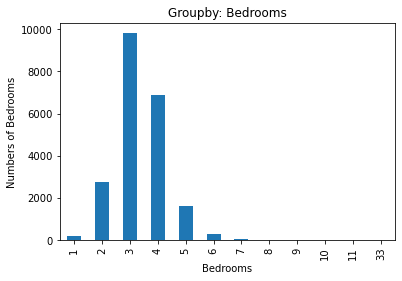

In [935]:
df_grupby_bedrooms.describe()['price']['count'].plot.bar()
plt.title('Groupby: Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Numbers of Bedrooms')

<AxesSubplot:xlabel='bedrooms'>

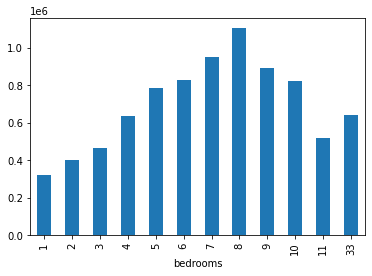

In [933]:
df_grupby_bedrooms.describe()['price']['mean'].plot.bar()


<ipython-input-926-19d620b4c37f>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


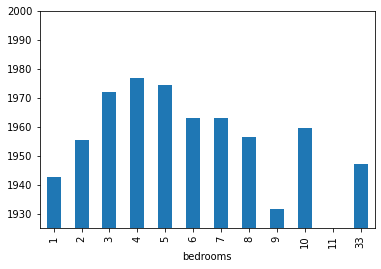

<Figure size 432x288 with 0 Axes>

In [926]:
df_grupby_bedrooms.describe()['yr_built']['mean'].plot.bar(ylim = (1925, 2000))
plt.subplot()


In [936]:
df = df[df['bedrooms'] < 9]
df.groupby('bedrooms').describe()

price                                                          \
            count        mean        std        min        25%        50%   
bedrooms                                                                    
1         196.000  318239.459 148589.636  80000.000 223000.000 299000.000   
2        2760.000  401387.747 198128.921  78000.000 269837.500 374000.000   
3        9824.000  466276.591 262620.686  82000.000 295487.500 413000.000   
4        6882.000  635564.677 388901.182 100000.000 376962.500 549997.500   
5        1601.000  786874.126 596536.599 133000.000 438000.000 620000.000   
6         272.000  825853.504 799610.343 175000.000 435000.000 650000.000   
7          38.000  951447.816 740350.185 280000.000 539250.000 728580.000   
8          13.000 1105076.923 897495.725 340000.000 490000.000 700000.000   

                                 bathrooms        ... sqft_basement           \
                 75%         max     count  mean  ...           75%      max   
bedrooms                                          ...                          
1         390000.000 1250000.000   196.000 1.083  ...         0.000 1440.000   
2         490000.000 3280000.000  2760.000 1.402  ...       150.000 2490.000   
3         560000.000 3800000.000  9824.000 1.968  ...       420.000 2160.000   
4         765000.000 4490000.000  6882.000 2.436  ...       740.000 3500.000   
5         913888.000 7060000.000  1601.000 2.779  ...      1070.000 4820.000   
6         896250.000 7700000.000   272.000 3.068  ...      1250.000 3480.000   
7         946500.000 3200000.000    38.000 3.651  ...      1387.500 4130.000   
8        1650000.000 3300000.000    13.000 3.558  ...      1500.000 2020.000   

              lat                                                  
            count   mean   std    min    25%    50%    75%    max  
bedrooms                                                           
1         196.000 47.569 0.122 47.208 47.508 47.562 47.675 47.774  
2        2760.000 47.589 0.118 47.194 47.517 47.603 47.687 47.778  
3        9824.000 47.551 0.146 47.156 47.444 47.565 47.680 47.778  
4        6882.000 47.556 0.139 47.159 47.460 47.571 47.672 47.778  
5        1601.000 47.574 0.120 47.178 47.507 47.583 47.665 47.777  
6         272.000 47.580 0.121 47.188 47.521 47.602 47.672 47.773  
7          38.000 47.609 0.096 47.319 47.541 47.621 47.678 47.755  
8          13.000 47.630 0.077 47.479 47.624 47.632 47.667 47.757  

[8 rows x 72 columns]

### Lägen/Breitengrad untersuchen

In [852]:
df_pice_lat = df[['price', 'lat']]
df_pice_lat

,price,lat
0,221900.000,47.511
1,538000.000,47.721
2,180000.000,47.738
3,604000.000,47.521
4,510000.000,47.617
...,...,...
21592,360000.000,47.699
21593,400000.000,47.511
21594,402101.000,47.594
21595,400000.000,47.535


Text(0, 0.5, 'Longnitude')

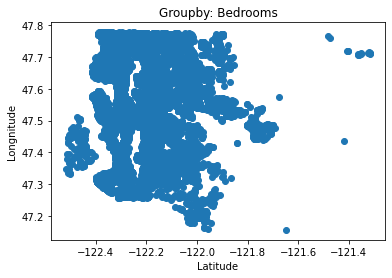

In [939]:
plt.scatter(df_result['long'], df_result['lat'])
plt.title('Groupby: Bedrooms')
plt.xlabel('Latitude')
plt.ylabel('Longnitude')

Text(0, 0.5, 'Longnitude')

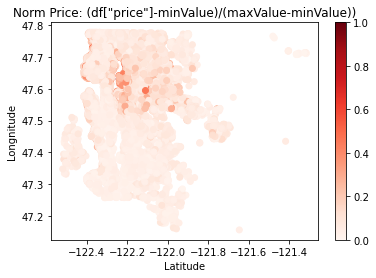

In [943]:
maxValue = df_result['price'].max()
minValue = df_result['price'].min()
normPrice = (df_result['price'] - minValue)/(maxValue-minValue)

heatmap = plt.scatter(df_result['long'], df_result['lat'], c=normPrice, cmap='Reds')
plt.colorbar(heatmap)
plt.title('Norm Price: (df["price"]-minValue)/(maxValue-minValue))')
plt.xlabel('Latitude')
plt.ylabel('Longnitude')

### Datum

In [855]:
df.loc[:,'date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21586, dtype: object

In [856]:
def string2date(x):
    x = x.split("/")
    return dt.datetime(int(x[2]), int(x[0]), int(x[1]))

df.loc[:,'date'] = df.loc[:,'date'].map(string2date)

C:\Users\Yusuf\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [857]:
df.loc[:,'date'].max() - df.loc[:,'date'].min()

Timedelta('390 days 00:00:00')

In [858]:
df_complete_edit = df.copy()

In [859]:
df_complete_edit['monthofyear'] = df_complete_edit['date'].map(lambda x: x.month)

In [860]:
df_complete_edit['date'].min()

Timestamp('2014-05-02 00:00:00')

In [861]:
df_complete_edit['date'].max()

Timestamp('2015-05-27 00:00:00')

Text(0, 0.5, 'Number of Sales')

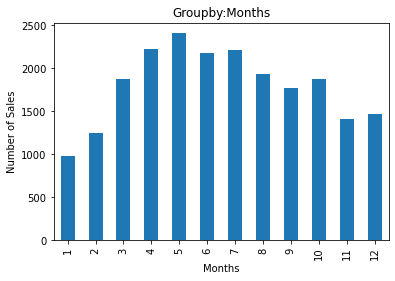

In [945]:
df_complete_edit.groupby('monthofyear').describe()['price']['count'].plot.bar()
plt.title('Groupby:Months')
plt.xlabel('Months')
plt.ylabel('Number of Sales')

Text(0, 0.5, 'Average Price')

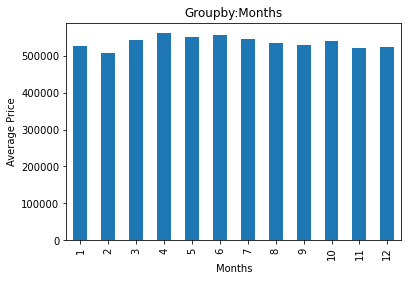

In [946]:
df_complete_edit.groupby('monthofyear').describe()['price']['mean'].plot.bar()
plt.title('Groupby:Months')
plt.xlabel('Months')
plt.ylabel('Average Price')

In [947]:
df_complete_edit.groupby('monthofyear').describe()['price']['mean'].std()

15702.052872759881

In [865]:
df.drop("date", axis=1, inplace=True)

C:\Users\Yusuf\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [866]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.000,3,1.000,1180,5650,1.000,0.000,0.000,3,7,1180,0.0,1955,98178,47.511,-122.257,1340,5650
1,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,98125,47.721,-122.319,1690,7639
2,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,98028,47.738,-122.233,2720,8062
3,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,98136,47.521,-122.393,1360,5000
4,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,98074,47.617,-122.045,1800,7503


### Yusuf Data Wrangling

In [867]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [868]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [869]:
df["sqft_basement"] = df["sqft_basement"].astype(float)
#df_result["sqft_basement"] =df_result.sqft_basement.replace("?", 0, inplace=True)

<ipython-input-869-92444e8f066d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sqft_basement"] = df["sqft_basement"].astype(float)


In [870]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [871]:
df_result.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Check For Price Correlation

<AxesSubplot:title={'center':'Correlations Matrix'}>

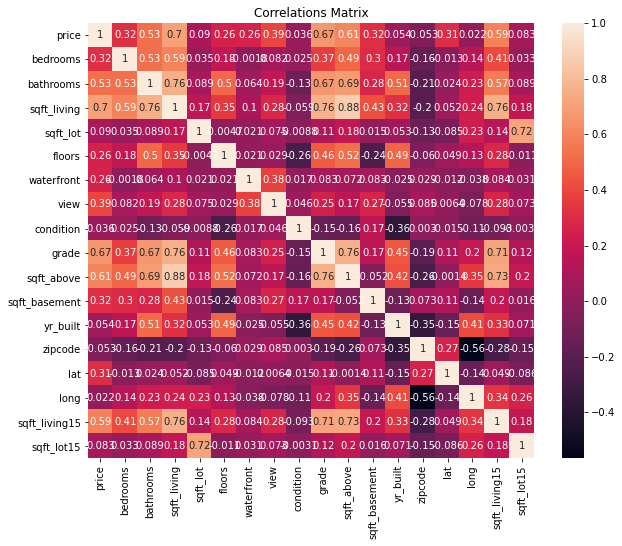

In [872]:
# corr = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
#        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
#        'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15',
#        'sqft_lot15',"lat", "long"]]
plt.figure(figsize=(10,8))
plt.title("Correlations Matrix")
sns.heatmap(df.corr(), annot=True)


In [873]:
df_result.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [874]:
df.drop(["sqft_lot15", "long","zipcode","yr_built","condition", "sqft_lot"], axis= 1, inplace =True)

C:\Users\Yusuf\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Explainetary Correlations

<AxesSubplot:title={'center':'Correlations Matrix'}>

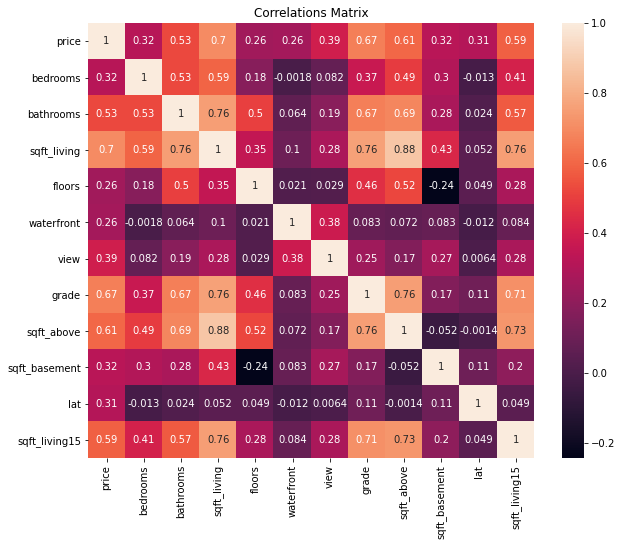

In [875]:
plt.figure(figsize=(10,8))
plt.title("Correlations Matrix")
sns.heatmap(df.corr(), annot=True)

In [876]:
df.drop(["sqft_above","sqft_living15"], axis= 1, inplace =True)

<AxesSubplot:title={'center':'Correlations Matrix'}>

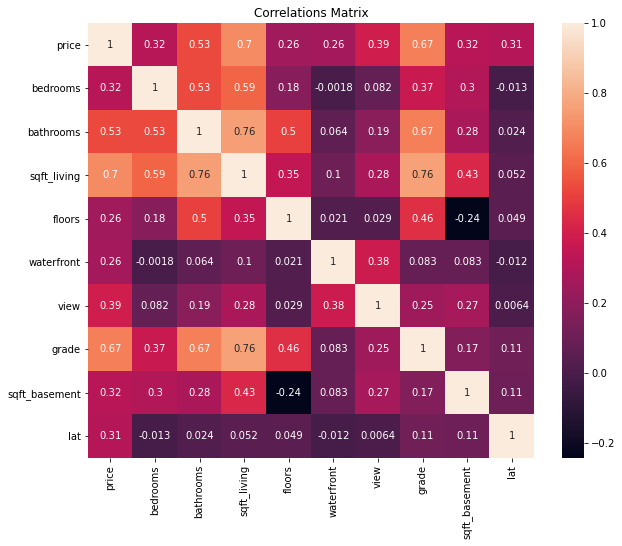

In [877]:
plt.figure(figsize=(10,8))
plt.title("Correlations Matrix")
sns.heatmap(df.corr(), annot=True)

In [878]:
#df_result["natural_log"]=np.log(df_result["price"])

In [879]:
#df_result.describe()

#### LR

In [880]:
#sns.pairplot(df_result);

In [881]:
explanatory_vars = df.columns[1:]

In [882]:
predictive_var = df.columns[0]

In [883]:
# simple linear regression with each explanatory variable
print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'price ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=df).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))
    
# sales predicting salesis included as explanatory variable for sanity check

R squared for each possible explanatory variable:
bedrooms 	 	= 0.101
bathrooms 	 	= 0.277
sqft_living 	 	= 0.493
floors  	 	= 0.0659
waterfront 	 	= 0.0699
view    	 	= 0.155
grade   	 	= 0.446
sqft_basement 	 	= 0.103
lat     	 	= 0.094


In [884]:
# best R^2 for "price", let's print the whole linear regression summary
smf.ols(formula='price ~ bedrooms', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2413.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:10:12   Log-Likelihood:            -3.0609e+05
No. Observations:               21586   AIC:                         6.122e+05
Df Residuals:                   21584   BIC:                         6.122e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.015e+05   9240.476     10.983      0.000    8.34e+04     1.2e+05
bedrooms    1.302e+05   2650.953     49.117      0.000    1.25e+05    1.35e+05
==============================================================================
Omnibus:                    18903.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1166730.869
Skew:                           3.940   Prob(JB):                         0.00
Kurtosis:                      38.144   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [885]:

# use all explanatory variables
join_string = " + ".join(df.columns[1:])
print(join_string)
model = 'price ~ ' + join_string
smf.ols(formula=model, data=df).fit().summary()

bedrooms + bathrooms + sqft_living + floors + waterfront + view + grade + sqft_basement + lat


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     4605.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:10:12   Log-Likelihood:            -2.9566e+05
No. Observations:               21586   AIC:                         5.913e+05
Df Residuals:                   21576   BIC:                         5.914e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.225e+07   5.12e+05    -62.935      0.000   -3.33e+07   -3.12e+07
bedrooms      -2.957e+04   2117.180    -13.964      0.000   -3.37e+04   -2.54e+04
bathrooms     -2945.8250   3276.566     -0.899      0.369   -9368.137    3476.487
sqft_living     197.5678      3.426     57.668      0.000     190.853     204.283
floors        -2.921e+04   3625.332     -8.056      0.000   -3.63e+04   -2.21e+04
waterfront     6.328e+05   1.93e+04     32.724      0.000    5.95e+05    6.71e+05
view           6.768e+04   2200.628     30.755      0.000    6.34e+04     7.2e+04
grade          8.332e+04   2139.219     38.949      0.000    7.91e+04    8.75e+04
sqft_basement     0.6694      4.384      0.153      0.879      -7.924       9.263
lat            6.701e+05   1.08e+04     62.006      0.000    6.49e+05    6.91e+05
==============================================================================
Omnibus:                    17917.928   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1500066.188
Skew:                           3.490   Prob(JB):                         0.00
Kurtosis:                      43.238   Cond. No.                     8.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [886]:
# Remove population and education. They have the largest p-values!
l = list(df.columns[1:].values)
l.remove("sqft_basement")
l.remove('bathrooms')

join_string = " + ".join(l)
print(join_string)
model = 'price ~ ' + join_string
ols_summary = smf.ols(formula=model, data=df).fit().summary()
ols_summary

bedrooms + sqft_living + floors + waterfront + view + grade + lat


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     5921.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:10:12   Log-Likelihood:            -2.9566e+05
No. Observations:               21586   AIC:                         5.913e+05
Df Residuals:                   21578   BIC:                         5.914e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.228e+07   5.06e+05    -63.839      0.000   -3.33e+07   -3.13e+07
bedrooms    -2.992e+04   2076.694    -14.407      0.000    -3.4e+04   -2.58e+04
sqft_living   196.6053      2.940     66.871      0.000     190.843     202.368
floors      -3.044e+04   3068.605     -9.921      0.000   -3.65e+04   -2.44e+04
waterfront   6.328e+05   1.93e+04     32.732      0.000    5.95e+05    6.71e+05
view         6.774e+04   2166.252     31.271      0.000    6.35e+04     7.2e+04
grade        8.299e+04   2075.262     39.991      0.000    7.89e+04    8.71e+04
lat          6.708e+05   1.07e+04     62.962      0.000     6.5e+05    6.92e+05
==============================================================================
Omnibus:                    17912.671   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1496929.864
Skew:                           3.489   Prob(JB):                         0.00
Kurtosis:                      43.195   Cond. No.                     7.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [887]:
l = list(df.columns[1:].values)

In [888]:
df.groupby('bedrooms').describe()['price'][['count', 'mean']]

,count,mean
bedrooms,,
1,196.000,318239.459
2,2760.000,401387.747
3,9824.000,466276.591
4,6882.000,635564.677
5,1601.000,786874.126
6,272.000,825853.504
7,38.000,951447.816
8,13.000,1105076.923


In [889]:
df.groupby('bedrooms').describe()['sqft_living'][['count', 'mean']]

,count,mean
bedrooms,,
1,196.000,888.153
2,2760.000,1239.753
3,9824.000,1805.837
4,6882.000,2554.650
5,1601.000,3047.545
6,272.000,3284.342
7,38.000,3974.211
8,13.000,3800.000


In [890]:
ols_summary.add_table_params

<bound method Summary.add_table_params of <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     5921.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:10:12   Log-Likelihood:            -2.9566e+05
No. Observations:               21586   AIC:                         5.913e+05
Df Residuals:                   21578   BIC:                         5.914e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [891]:
ols_summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.228e+07,5.06e+05,-63.839,0.000,-3.33e+07,-3.13e+07
bedrooms,-2.992e+04,2076.694,-14.407,0.000,-3.4e+04,-2.58e+04
sqft_living,196.6053,2.940,66.871,0.000,190.843,202.368
floors,-3.044e+04,3068.605,-9.921,0.000,-3.65e+04,-2.44e+04
waterfront,6.328e+05,1.93e+04,32.732,0.000,5.95e+05,6.71e+05
view,6.774e+04,2166.252,31.271,0.000,6.35e+04,7.2e+04
grade,8.299e+04,2075.262,39.991,0.000,7.89e+04,8.71e+04
lat,6.708e+05,1.07e+04,62.962,0.000,6.5e+05,6.92e+05


In [892]:
coef = {}

for values in ols_summary.tables[1].data[1:]:
    coef[values[0]] = float(values[1])

In [893]:
coef

{'Intercept': -32280000.0,
 'bedrooms': -29920.0,
 'sqft_living': 196.6053,
 'floors': -30440.0,
 'waterfront': 632800.0,
 'view': 67740.0,
 'grade': 82990.0,
 'lat': 670800.0}

In [894]:
def predict_price(x):
    y = coef['bedrooms'] * x['bedrooms'] + coef['sqft_living'] * x['sqft_living'] + coef['floors'] * x['floors'] + coef['waterfront'] * x['waterfront']
    + coef['view'] * x['view'] + coef['grade'] * x['grade'] + coef['lat'] * x['lat'] + coef['Intercept']
 
#     print("Predicted Price: " + str(y))
#     print("Real Price: " + str(x['price']))
    return y

In [895]:
err = 0
for index in df.index:
    y = predict_price(df.loc[index])
    err += pow(df.loc[index, 'price'] - y, 2)
print("Avg err: " + str(pow(err/len(df), 0.5)))

Avg err: 382515.7485685076


## Scikitlearn

In [896]:
#df_log = df.copy()
#df_log['price'] = df_log['price'].map(np.log)'

In [897]:
df_log

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,12.310,3,1.000,1180,1.000,0.000,0.000,7,0.000,47.511
1,13.196,3,2.250,2570,2.000,0.000,0.000,7,400.000,47.721
2,12.101,2,1.000,770,1.000,0.000,0.000,6,0.000,47.738
3,13.311,4,3.000,1960,1.000,0.000,0.000,7,910.000,47.521
4,13.142,3,2.000,1680,1.000,0.000,0.000,8,0.000,47.617
...,...,...,...,...,...,...,...,...,...,...
21592,12.794,3,2.500,1530,3.000,0.000,0.000,8,0.000,47.699
21593,12.899,4,2.500,2310,2.000,0.000,0.000,8,0.000,47.511
21594,12.904,2,0.750,1020,2.000,0.000,0.000,7,0.000,47.594
21595,12.899,3,2.500,1600,2.000,0.000,0.000,8,0.000,47.535


In [898]:
tain_set, test_set = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=True)

In [899]:
test_set

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
1858,550000.000,5,2.500,2960,1.000,0.000,0.000,7,1480.000,47.587
8477,332000.000,3,2.500,1530,1.000,0.000,0.000,7,260.000,47.485
3862,442000.000,3,1.500,2050,1.000,0.000,0.000,7,700.000,47.532
8410,520000.000,3,1.750,2310,1.000,0.000,2.000,8,730.000,47.770
1230,350000.000,4,2.500,2530,2.000,0.000,0.000,8,0.000,47.351
...,...,...,...,...,...,...,...,...,...,...
5614,874000.000,4,2.750,2860,1.000,0.000,1.000,7,1300.000,47.672
11715,1280000.000,4,3.000,3260,2.000,0.000,0.000,9,960.000,47.631
2721,438000.000,3,1.000,1200,1.500,0.000,0.000,6,0.000,47.588
9611,473000.000,3,1.000,1280,1.000,0.000,0.000,7,0.000,47.572


In [900]:
X = tain_set[["bedrooms", "sqft_living", "floors", "waterfront", "view", "grade", "lat"]]
y = tain_set['price']
reg = linear_model.LinearRegression().fit(X, y)

In [901]:
reg.score(X,y)

0.6610066176927865

In [902]:
X_test = test_set[["bedrooms", "sqft_living", "floors", "waterfront", "view", "grade", "lat"]]
y_test = test_set['price']
y_pred = reg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred, squared=False)

224159.1924311183

In [903]:
metrics.mean_absolute_error(y_test, y_pred)/df['price'].mean()


0.24738504860034632

In [904]:
df['price'].mean()

540155.70735662

#### Normalization

In [905]:
transformerX = preprocessing.StandardScaler().fit(X)
transformerY = preprocessing.StandardScaler().fit(y.to_numpy().reshape(-1,1))

In [906]:
X_norm = transformerX.transform(X)
y_norm = transformerY.transform(y.to_numpy().reshape(-1,1))
reg = linear_model.LinearRegression().fit(X_norm, y_norm)

In [907]:
reg.score(X_norm, y_norm)

0.6610066176927865

In [908]:
y_pred = reg.predict(transformerX.transform(X_test))
metrics.mean_squared_error(transformerY.transform(y_test.to_numpy().reshape(-1,1)), y_pred, squared=False)

0.6138191812159509

In [909]:
y_norm

array([[-0.4124778 ],
       [-0.82596384],
       [-0.31937499],
       ...,
       [ 0.15969377],
       [-0.41521612],
       [-0.68918485]])

# OLS with log(y)

In [913]:
df_log = df.copy()
df_log['price'] = df_log['price'].map(np.log)

In [914]:
df_log

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,12.310,3,1.000,1180,1.000,0.000,0.000,7,0.000,47.511
1,13.196,3,2.250,2570,2.000,0.000,0.000,7,400.000,47.721
2,12.101,2,1.000,770,1.000,0.000,0.000,6,0.000,47.738
3,13.311,4,3.000,1960,1.000,0.000,0.000,7,910.000,47.521
4,13.142,3,2.000,1680,1.000,0.000,0.000,8,0.000,47.617
...,...,...,...,...,...,...,...,...,...,...
21592,12.794,3,2.500,1530,3.000,0.000,0.000,8,0.000,47.699
21593,12.899,4,2.500,2310,2.000,0.000,0.000,8,0.000,47.511
21594,12.904,2,0.750,1020,2.000,0.000,0.000,7,0.000,47.594
21595,12.899,3,2.500,1600,2.000,0.000,0.000,8,0.000,47.535


In [915]:
tain_set, test_set = train_test_split(df_log, train_size=0.8, test_size=0.2, shuffle=True)

In [916]:
test_set

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
1516,13.122,3,2.000,1720,1.000,0.000,2.000,7,760.000,47.559
5991,11.932,3,1.750,1070,1.000,0.000,0.000,6,0.000,47.508
8365,12.983,5,2.000,1840,1.000,0.000,0.000,7,300.000,47.731
7803,13.028,2,1.000,1170,1.000,0.000,0.000,7,200.000,47.699
18037,12.899,5,1.750,2300,2.000,0.000,0.000,7,0.000,47.528
...,...,...,...,...,...,...,...,...,...,...
281,12.044,2,1.000,860,1.000,0.000,0.000,6,0.000,47.505
12785,12.794,4,3.000,2580,2.000,0.000,0.000,8,0.000,47.430
17191,13.588,3,2.750,2590,2.000,0.000,0.000,10,0.000,47.553
1091,13.501,5,1.750,2690,1.000,0.000,0.000,7,1270.000,47.583


In [917]:
X = tain_set[["bedrooms", "sqft_living", "floors", "waterfront", "view", "grade", "lat"]]
y = tain_set['price']
reg = linear_model.LinearRegression().fit(X, y)

In [918]:
reg.score(X,y)

0.7262424033955057

In [919]:
X_test = test_set[["bedrooms", "sqft_living", "floors", "waterfront", "view", "grade", "lat"]]
y_test = test_set['price']
y_pred = reg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred, squared=False)

0.2757937431859609